**Information:** *Brief introduction to gradient descent, how gradient descent is supported in pytorch, convex functions, and some numerical considerations to kept in mind*

**Written by:** *Zihao Xu*

**Last update date:** *05.27.2021*

# Gradient Descent Optimization
## Motivation
- Most ML/DL algorithms involve **optimization** of some sort. 
    - Optimization refers to the task of either **minimizing** or maximizing some function $f(\mathbf{x})$ by altering $\mathbf{x}$
    - Usually phrase most optimization problems in terms of minimizing $f(\mathbf{x})$
    - Maximization may be accomplished via s minimization algorithm by minimizing $-f(\mathbf{x})$
- Usually the function we want to minimize is called the **objective function**, or **criterion**. In ML/DL contexts, the name **loss function** is often used.
    - As mentioned in introduction, a loss function quantifies the *distance* between the **real** and **predicted** value of the target.
    - Usually be a non-negative number where smaller values are better and perfect predictions incur a loss of $0$
    - Usually denoted as $L(\boldsymbol{\theta})$ where $\boldsymbol{\theta}$ is usually the parameter of ML/DL models 
- Usually denote the value that minimizes a function with a superscript $*$
    - $\boldsymbol{\theta}^*=\text{arg}\underset{\boldsymbol{\theta}}{\text{min}}L(\boldsymbol{\theta})$
- Most ML/DL algorithms are so complex that it is difficult or impossible to find the closed form solution for the optimization problem
    - Use numerical optimization method instead
- One common algorithm is **gradient descent**, other optimization algorithms are
    - Expectation Maximization
    - Sampling-based optimization
    - Greedy optimization

## Definition
- **Definition**:
    - A **first-order iterative** optimization algorithm for finding **local minimum** of a **differential** function.
        - The idea is to take **repeated steps** in the opposite direction of the **gradient** of the function at the current point, because this is the direction of steepest descent.
        - As it calculates the **first-order** derivative, it requires the objective function to be **differential**
        - Converge when first-order derivative is zero, which only ensures reaching **local minimum** for general functions
- **Theory**:
    - Based on the observation that if the multi-variable function $F(\mathbf{x})$ is defined and differentiable in a neighborhood of a point $\mathbf{a}$, then $F(\mathbf{x})$ decreases **fastest** if one goes from $\mathbf{a}$ in the direction of the negative gradient of $F$ at $\mathbf{a}$, which is $-\nabla F(\mathbf{a})$. It follows that if $$\mathbf{a}_{n+1}=\mathbf{a}_n-\gamma\nabla F(\mathbf{a}_n)$$ for a $\gamma\in\mathbb{R}_+$ small enough, then $$F(\mathbf{a}_n)\ge F(\mathbf{a}_{n+1})$$
- Simple form of **vanilla gradient descent** (GD):
    1. Start at random parameter $\boldsymbol{\theta}$
    2. Repeat until converged
        - $\mathbf{d}\leftarrow-\nabla L(\boldsymbol{\theta})$
        - $\boldsymbol{\theta}\leftarrow\boldsymbol{\theta}+\alpha\mathbf{d}^T$
    - $\alpha$ is called **learning rate** or **step size**

## Select appropriate learning rate
- Too large $\alpha$ leads to instability and even divergence
- Too small $\alpha$ leads to slow convergence
- **Steepest gradient descent** use line search to compute the best $\alpha$
    1. Start at random parameter $\boldsymbol{\theta}$
    2. Repeat until converged
        - $\mathbf{d}\leftarrow-\nabla L(\boldsymbol{\theta})$
        - $\alpha^*\leftarrow\text{arg}\underset{\alpha}{\text{min}}\{L(\boldsymbol{\theta}+\alpha\mathbf{d}^T)\}$
        - $\boldsymbol{\theta}\leftarrow\boldsymbol{\theta}+\alpha^*\mathbf{d}^T$
- **Adaptive learning rates** may help, but not always
    - $\alpha=\frac{1}{t}$, approaches 0 but can cover an infinite distance since $\underset{a\rightarrow\infty}{\text{lim}}\underset{t=1}{\overset{a}{\Sigma}}\frac{1}{t}=\infty$
- **Coordinate Descent** update one parameter at a time
    - Removes problem of selecting step size
    - Each update can be very fast, but lots of updates

## Slow convergence due to Poor Conditioning
- **Conditioning** refers to how rapidly a function changes with respect to small changes in its inputs.
- Consider the function $$f(x)=\mathbf{A}^{-1}\mathbf{x}$$ When $\mathbf{A}\in\mathbb{R}^{n\times n}$ has an eigenvalue decomposition, its **condition number** is $$\underset{i,j}{\text{max}}\left|\frac{\lambda_i}{\lambda_j}\right|$$ This is the ratio of the magnitude of the largest and smallest eigenvalue
- A problem with a **low condition number** is said to be **well-conditioned**, while a problem with a high condition number is said to be ill-conditioned
    - In non-mathematical terms, an ill-conditioned problem is one where, for a small change in the inputs there is a large change in the answer or dependent variable, which means the correct solution to the equation becomes hard to find
    - Condition number is a property of the problem
- **Gradient descent** is very sensitive to **condition number** of the problem
    - No good choice of step size. Tiny change in one variable could lead to great change in dependent variable.
- **Solutions:**
    - **Newton's method:** Correct for local second derivative. (Sphere the ellipse)
        - Too much computation and too difficult to implement
    - **Alternative methods**:
        - Preconditioning: Easy, but tends to be ad-hoc, not so robust
        - Momentum

## Compute Loss Gradient
- Take the **mean square error** as an example: $$\begin{aligned}\nabla_{\boldsymbol{\theta}}L_{MSE}(\boldsymbol{\theta})&=\nabla_{\boldsymbol{\theta}}\left\{\frac{1}{N}\underset{i=1}{\overset{N}{\Sigma}}\left\|\mathbf{y}_i-f_{\boldsymbol{\theta}}(\mathbf{x}_i)\right\|^2\right\}\\&=\frac{1}{N}\underset{i=1}{\overset{N}{\Sigma}}\nabla_{\boldsymbol{\theta}}\left\{(\mathbf{y}_i-f_{\boldsymbol{\theta}}(\mathbf{x}_i))^T(\mathbf{y}_i-f_{\boldsymbol{\theta}}(\mathbf{x}_i))\right\}\end{aligned}$$ Use the chain rule and scale-by-vector matrix calculus identity that $$\frac{\partial \mathbf{x}^T\mathbf{x}}{\partial \mathbf{x}}=2\mathbf{x}^T$$ We can get $$\begin{aligned}\nabla_{\boldsymbol{\theta}}L_{MSE}(\boldsymbol{\theta})&=\frac{2}{N}\underset{i=1}{\overset{N}{\Sigma}}(\mathbf{y}_i-f_{\boldsymbol{\theta}}(\mathbf{x}_i))^T\nabla_{\boldsymbol{\theta}}(\mathbf{y}_i-f_{\boldsymbol{\theta}}(\mathbf{x}_i))\\&=\frac{2}{N}\underset{i=1}{\overset{N}{\Sigma}}(\mathbf{y}_i-f_{\boldsymbol{\theta}}(\mathbf{x}_i))^T\nabla_{\boldsymbol{\theta}}(-f_{\boldsymbol{\theta}}(\mathbf{x}_i))\\&=-\frac{2}{N}\underset{i=1}{\overset{N}{\Sigma}}(\mathbf{y}_i-f_{\boldsymbol{\theta}}(\mathbf{x}_i))^T\nabla_{\boldsymbol{\theta}}(f_{\boldsymbol{\theta}}(\mathbf{x}_i))\end{aligned}$$
- The result of the gradient usually includes three parts:
    - Sum over training data. It consists of a lot of computations but the way of computation is relatively easy and straight forward
    - Prediction error term such as $\mathbf{y}_i-f_{\boldsymbol{\theta}}(\mathbf{x}_i)$ in MSE, which is usually easy to get
    - Gradient of inference function $\nabla_{\boldsymbol{\theta}}(f_{\boldsymbol{\theta}}(\mathbf{x}_i))$, which is difficult to solve
        - Enabled by automatic differentiation built into modern domain specific languages such as Pytorch, Tensorflow, ...
        - For neural networks, this is known as **back propagation**

%%latex
\newpage

# Automatic Differentiation via Pytorch

## Data Manipulation via Pytorch
- The $n$-dimensional array is usually called the tensor
- *tensor* class in Pytorch is similar to *NumPy*'s *ndarray* with several additional features
    - GPU is well-supported to accelerate the computation whereas *NumPy* only supports CPU computation
    - *tensor* class supports automatic differentiation
- The [Pytorch documentation](https://pytorch.org/docs/master/torch.html) shows the full attributes

### Create a tensor
- To get started, import **torch**. Although it's called Pytorch, we should import **torch** instead of pytorch

In [1]:
import torch
# Check the version of a module
print(torch.__version__)

1.8.1


- Common ways to creating a tensor
    - torch.arange(start,end,step)
    - torch.zeros(shape)
    - torch.ones(shape)
    - torch.randn(shape)
    - torch.tensor(elements)

In [2]:
torch.arange(0, 12, 1)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
torch.zeros((3, 4))

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [4]:
torch.ones((2, 5))

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [5]:
torch.randn(10)

tensor([ 0.1833, -1.4853, -2.6226,  1.3522, -0.7521,  1.5946,  1.5680, -0.4013,
        -1.8723, -1.3914])

In [6]:
torch.tensor([[1, 2, 3], [4, 5, 6]])

tensor([[1, 2, 3],
        [4, 5, 6]])

- One can access a tensor's shape by viewing the **shape** attribute

In [7]:
torch.ones((4, 5)).shape

torch.Size([4, 5])

- **reshape** method can change the shape of a tensor without altering either the number of elements or their values.
    - No need to manually specify every dimension
    - Can place $-1$ for the dimension that we would like tensors to automatically infer

In [8]:
torch.arange(12).reshape(3, 4)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [9]:
torch.arange(12).reshape(3, -1)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

### Type of a tensor
- Usually, a tensor is created as **tensor.float32** (32-bit floating point) by default. One can view its type in the **dtype** attribute
    - When creating a tensor using **torch.tensor**, tensor with all integers would be created as **torch.int64** (64-bit signed integer)
- Full tensor types can be viewed in the [documentation](https://pytorch.org/docs/master/tensor_attributes.html#torch.torch.dtype)

In [10]:
torch.ones(10).dtype

torch.float32

In [11]:
torch.tensor([[1, 2, 3], [4, 5, 6]]).dtype

torch.int64

In [12]:
# Only add one dot after the first element
torch.tensor([[1., 2, 3], [4, 5, 6]]).dtype

torch.float32

- One can assign the wanted type when creating the tensor by setting the **dtype** attribute to
    - *torch.float32*, 32-bit floating point
    - *torch.float64*, 64-bit floating point
    - *torch.uint8*, 8-bit unsigned integer
    - *torch.int8*, 8-bit signed integer
    - *torch.int32*, 32-bit signed integer
    - *torch.int64*, 64-bit signed integer
    - *torch.bool*, Boolean

In [13]:
torch.ones(10, dtype=torch.float64).dtype

torch.float64

In [14]:
torch.ones(10, dtype=torch.uint8).dtype

torch.uint8

In [15]:
torch.ones(10, dtype=torch.int32).dtype

torch.int32

- One can also construct the type of a tensor from list or numpy array using the method:
    - *FloatTensor*, 32-bit floating point
    - *DoubleTensor*, 64-bit floating point
    - *ByteTensor*, 8-bit unsigned integer
    - *CharTensor*, 8-bit signed integer
    - *IntTensor*, 32-bit signed integer
    - *LongTensor*, 64-bit signed integer
    - *BoolTensor*, Boolean

In [16]:
torch.DoubleTensor([1, 2, 3]).dtype

torch.float64

In [17]:
torch.ByteTensor([1, 2, 3]).dtype

torch.uint8

### Use GPU for tensor computation
- Unless otherwise specified, a new tensor will be stored in main memory and designated for CPU-based computation
- One can check which device the tensor is designated for by viewing the **device** attribute

In [18]:
torch.ones(10).device

device(type='cpu')

- One can always set the create a device if a GPU supporting cuda is available and use **to(device)** method to determine the device on which a tensor is or will be allocated
    - Assign the **device** parameter when creating a tensor also works

In [19]:
cuda0 = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cuda0

device(type='cuda', index=0)

In [20]:
torch.ones(5, device=cuda0)

tensor([1., 1., 1., 1., 1.], device='cuda:0')

In [21]:
# If available, indexing the cuda also works
torch.ones(5, device=0)

tensor([1., 1., 1., 1., 1.], device='cuda:0')

In [22]:
# If avaiable, the string also works
torch.ones(5, device="cuda:0")

tensor([1., 1., 1., 1., 1.], device='cuda:0')

In [23]:
# Use the to method the move a tensor
x = torch.ones(5).to(cuda0)
x

tensor([1., 1., 1., 1., 1.], device='cuda:0')

In [24]:
# One can also move a tensor from GPU to CPU
x.to("cpu").device

device(type='cpu')

### Operations
- Common standard arithmetic operators have all been lifted to element-wise operations

In [25]:
x = torch.tensor([1., 2., 4., 8.])
c = 1.
x + c, x * c, x**c

(tensor([2., 3., 5., 9.]), tensor([1., 2., 4., 8.]), tensor([1., 2., 4., 8.]))

In [26]:
x = torch.tensor([1., 2., 4., 8.])
y = torch.tensor([4., 3., 2., 1.])
x + y, x * y, x**y

(tensor([5., 5., 6., 9.]),
 tensor([4., 6., 8., 8.]),
 tensor([ 1.,  8., 16.,  8.]))

In [27]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

- Matrix multiplication is also supported

In [28]:
A = torch.randn((4, 3))
B = torch.randn((3, 5))
# Two ways of matrix multiplication
torch.mm(A, B), A @ B

(tensor([[ 1.7055, -0.0886,  1.8231,  1.7564, -2.7292],
         [-2.0987, -0.2093, -2.1729, -1.9152,  1.6844],
         [ 0.1432,  0.4736,  0.6370, -0.4225, -2.1120],
         [-0.5778,  0.4198, -0.0482, -1.1163, -1.9259]]),
 tensor([[ 1.7055, -0.0886,  1.8231,  1.7564, -2.7292],
         [-2.0987, -0.2093, -2.1729, -1.9152,  1.6844],
         [ 0.1432,  0.4736,  0.6370, -0.4225, -2.1120],
         [-0.5778,  0.4198, -0.0482, -1.1163, -1.9259]]))

In [29]:
A = torch.randn((5, 4))
B = torch.randn((5, 4))
# Two ways of elementwise multiplication
torch.mul(A, B), A * B

(tensor([[-0.0949, -1.5523, -0.2367,  0.4972],
         [-0.4520,  0.1967, -0.0363,  0.3360],
         [ 1.0668, -0.3951, -0.1567, -0.3507],
         [ 0.3363,  0.1538, -0.0893,  0.0107],
         [ 0.5939, -0.9762, -0.0580,  0.1045]]),
 tensor([[-0.0949, -1.5523, -0.2367,  0.4972],
         [-0.4520,  0.1967, -0.0363,  0.3360],
         [ 1.0668, -0.3951, -0.1567, -0.3507],
         [ 0.3363,  0.1538, -0.0893,  0.0107],
         [ 0.5939, -0.9762, -0.0580,  0.1045]]))

- We can also **concatenate** multiple tensors together, stacking them end-to-end to form a larger tensor. We just need to provide a list of tensors and tell the system along which axis to concatenate. 

In [30]:
A = torch.arange(0, 12, 1).reshape((3, 4))
B = torch.ones((3, 4))
# dim stands for the index of dimension in which the tensors are concatenated
torch.cat((A, B), dim=0), torch.cat((A, B), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 1.,  1.,  1.,  1.],
         [ 1.,  1.,  1.,  1.],
         [ 1.,  1.,  1.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  1.,  1.,  1.,  1.],
         [ 4.,  5.,  6.,  7.,  1.,  1.,  1.,  1.],
         [ 8.,  9., 10., 11.,  1.,  1.,  1.,  1.]]))

- Also, we can construct a binary tensor via logical statements

In [31]:
A = torch.arange(0, 12, 1).reshape((3, 4))
B = 5 * torch.ones((3, 4))
A == B, A > B

(tensor([[False, False, False, False],
         [False,  True, False, False],
         [False, False, False, False]]),
 tensor([[False, False, False, False],
         [False, False,  True,  True],
         [ True,  True,  True,  True]]))

### Broadcasting Mechanism
- Under certain conditions, even shapes differ, we can still perform **element-wise** operations by invoking the **broadcasting mechanism**.
    - First, expand one or both arrays by copying elements appropriately so that after this transformation, the two tensors have the same shape.
    - Second, carry out the element-wise operation on the resulting arrays
- In most cases, we broadcast along an axis where an array initially only has length 1

In [32]:
a = torch.arange(3).reshape(3, 1)
b = torch.arange(2).reshape(1, 2)
a, b, a + b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]),
 tensor([[0, 1],
         [1, 2],
         [2, 3]]))

### Indexing and Slicing
- As in standard Python lists, we can access elements according to their relative position to the end of the list by using negative indices

In [33]:
X = torch.arange(16).reshape(4, 4)
X, X[-1], X[1:3]

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15]]),
 tensor([12, 13, 14, 15]),
 tensor([[ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]))

- Can also index using binary tensor

In [34]:
A = torch.arange(0, 12, 1).reshape((3, 4))
B = 5 * torch.ones((3, 4))
A, B, A[A > B]

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]),
 tensor([[5., 5., 5., 5.],
         [5., 5., 5., 5.],
         [5., 5., 5., 5.]]),
 tensor([ 6,  7,  8,  9, 10, 11]))

## Automatic Calculation of Gradients
- In practice, based on our designed model, the system builds a **computational graph**, tracking which data combined through which operations to produce the output. Automatic differentiation enables the system to subsequently **backpropagate gradients**.
    - Here *backpropagate* simply means to trace through the computational graph, filling in the partial derivatives with respect to each parameter

### Intuition
- All computation can be broken into simple components
    - sum
    - multiply
    - exponential
    - convolution
    - ...
- Derivatives for each simple component can be derived mathematically
- Derivatives for **any composition** can be derived via **chain rule**

### Forward Mode Mathematical Representation via a simple example
- For a function $$f(x_1,x_2)=\text{ln}(x_1)+x_1x_2-\text{sin}(x_2)$$ the forward mode computation graph is shown below

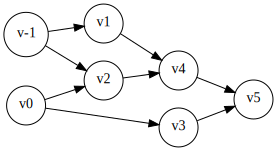

In [35]:
from graphviz import Digraph

f = Digraph('ComputationGraph')
f.attr(rankdir='LR')
f.attr('node', shape='circle')
f.node('v_-1', label='<v<sub>-1</sub>>')
f.node('v_0', label='<v<sub>0</sub>>')
f.node('v_1', label='<v<sub>1</sub>>')
f.node('v_2', label='<v<sub>2</sub>>')
f.node('v_3', label='<v<sub>3</sub>>')
f.node('v_4', label='<v<sub>4</sub>>')
f.node('v_5', label='<v<sub>5</sub>>')
f.edge('v_-1', 'v_1')
f.edge('v_-1', 'v_2')
f.edge('v_0', 'v_2')
f.edge('v_0', 'v_3')
f.edge('v_1', 'v_4')
f.edge('v_2', 'v_4')
f.edge('v_4', 'v_5')
f.edge('v_3', 'v_5')
f

- To find the **partial derivate** $\frac{\partial f}{\partial x_1}$ when $x_1=2,x_2=5$, the Forward Evaluation Trace and Derivative Trace is:
    1. Give the initial value and set initial derivative, notice the derivative of $x_1$ is set to be one while derivative of $x_2$ is set to $0$
    $$\begin{aligned}v_{-1}&=x_1=2\\ \dot{v}_{-1}&=\dot{x}_1=1\end{aligned},\ \begin{aligned}v_0&=x_2=5\\ \dot{v}_{0}&=\dot{x}_2=0\end{aligned}$$
    2. Calculate $v_1$ and $v_2$ while keep tracking their derivatives
    $$\begin{aligned}v_1&=\text{ln}v_{-1}=\text{ln}2\\ \dot{v}_1&=\dot{v}_{-1}/v_{-1}=1/2\end{aligned},\  \begin{aligned}v_2&=v_{-1}\times v_0=10\\ \dot{v}_2&=\dot{v}_{-1}\times v_0+\dot{v}_0\times v_{-1}=1\times 5 +0\times 2\end{aligned}$$
    3. Calculate $v_3$ and $v_4$ while keep tracking their derivatives
    $$\begin{aligned}v_3&=\text{sin}v_0=\text{sin}5\\ \dot{v}_3&=\dot{v}_0\times\text{cos}v_0=0\times\text{cos}5\end{aligned},\  \begin{aligned}v_4&=v_1+v_2=0.693+10\\ \dot{x}_4&=\dot{v}_1+\dot{v}_2=0.5+5\end{aligned}$$
    4. Get the final result and derivative
    $$\begin{aligned}y&=v_5=v_4-v_3=10.693+0.959\\ \dot{y}&=\dot{v}_5=\dot{v}_4-\dot{v}_3=5.5-0\end{aligned}$$
    5. Therefore, the result is $$\frac{\partial f}{\partial x_1}=5.5|_{x_1=2,x_2=5}$$
- Therefore, for a $n$-dimensional input and $1$-dimensional output
    - Only calculate once for the output
    - Need to calculate $n$ times for all the partial derivatives.
        - Each time set one initial derivative to be $1$ and other initial derivative to be $0$
    - **Low efficiency** when $n$ is large, which is common in complex models

### Build the computation graph by tracking data
- PyTorch automatically creates a computation graph if **requires_grad=True**
- For a given variable with **requires_grad=True**, identify the operations